Task 3:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

                                                                        post
2401 Borderlands Positive  im getting on borderlands and i will murder yo...
                 Positive  I am coming to the borders and I will kill you...
                 Positive  im getting on borderlands and i will kill you ...
                 Positive  im coming on borderlands and i will murder you...
                 Positive  im getting on borderlands 2 and i will murder ...


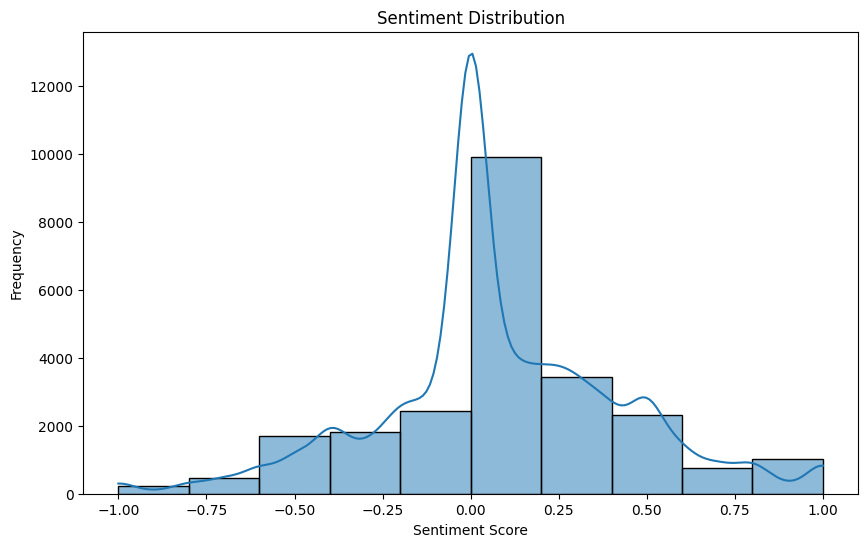

<ipython-input-1-e71757839f0c>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis')


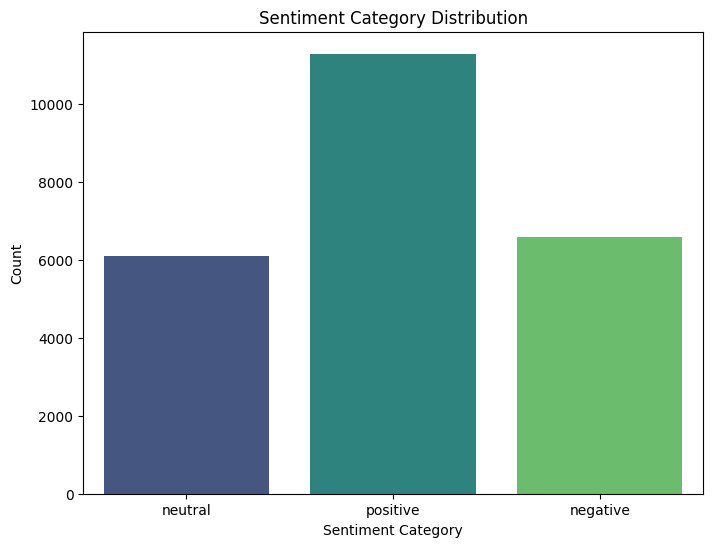

In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/senti.csv', header=None, names=['post'])

print(df.head())

df['post'].fillna('', inplace=True)

df['post'] = df['post'].astype(str)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

df['cleaned_post'] = df['post'].apply(clean_text)


def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

df['sentiment'] = df['cleaned_post'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=10, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()